In [1]:
from kafka import KafkaConsumer
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
from kafka import KafkaConsumer
import json

consumer = KafkaConsumer(
    'test',
    bootstrap_servers='localhost:9092',
    auto_offset_reset='latest',
    enable_auto_commit=True
)

count = 0
max_messages = 10
data_list = []  # tu zapisujemy dane np. do wykresu

for message in consumer:
    try:
        data = json.loads(message.value)
        print("Dane:", data)
        data_list.append(data)
        count += 1
        if count >= max_messages:
            break
    except json.JSONDecodeError:
        print("Błąd dekodowania:", message.value)


Dane: {'symbol': 'BTCUSDT', 'price': '95436.13000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95440.68000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95440.67000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95440.67000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95440.67000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95453.89000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95453.88000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95453.88000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95453.89000000'}
Dane: {'symbol': 'BTCUSDT', 'price': '95453.89000000'}


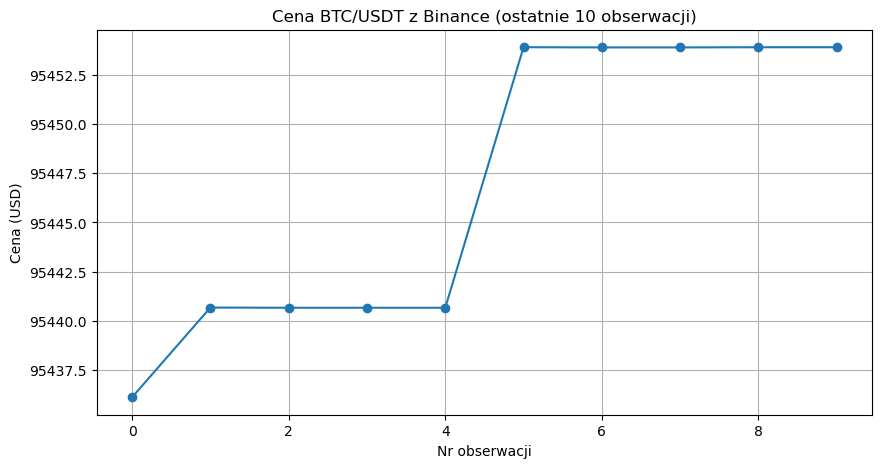

In [5]:
import matplotlib.pyplot as plt

# Zakładamy, że masz już data_list z 10 elementami
prices = [float(item['price']) for item in data_list]
symbols = [item['symbol'] for item in data_list]  # choć pewnie cały czas 'BTCUSDT'

# Tworzymy wykres
plt.figure(figsize=(10, 5))
plt.plot(prices, marker='o')
plt.title('Cena BTC/USDT z Binance (ostatnie 10 obserwacji)')
plt.xlabel('Nr obserwacji')
plt.ylabel('Cena (USD)')
plt.grid(True)
plt.show()
